[Table of Contents](table_of_contents.ipynb)

# Topic 27.  Gradient Descent
Author: Jordan Brown (3jordanbrown@gmail.com)
    

##  Introduction

Gradient descent, or steepest descent, is a function optimization method which iteratively approaches a minimum-cost solution for a function. It accomplishes this goal by updating the function after each iteration in such a way that it moves in the "direction of motion," or towards a minimum (or at least a local minimum).

Gradient descent is important as it allows a simple, fairly resource non-intensive way to solve difficult problems for which a precise model may be unkown, or direct minima calculation is complex. It also allows for adaptive solutions to such problems where new information may become available, and the model needs to be updated to reflect the new information. This is an idea commonly used in machine learning, for example, to train a neural network model to best approximate some unknown model for which inputs and desired outputs are known (like in the Engineering Application section below).

## Explanation of the theory

In my opinion, one of the easiest ways to introduce gradient descent is by visualizing a simplified example. For example, consider some equation for which the performance was evaluated by observing the error between the estimated model output, and some real desired output. 


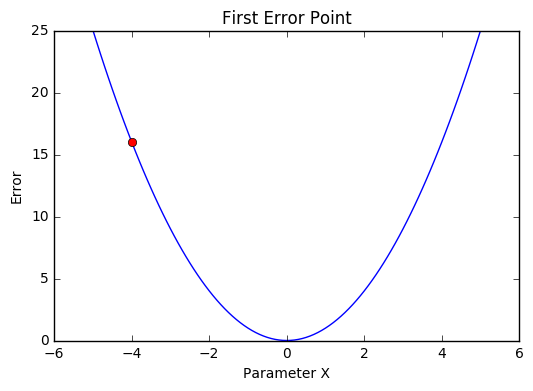

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ins = np.arange(-5.0,5.1,.1)
err = [x**2 for x in ins]

plt.plot(ins,err)
plt.plot(-4,16,'ro')
plt.xlabel('Parameter X')
plt.ylabel('Error')
plt.title('First Error Point')
plt.show()


Now imagine that we didn't know the shape of the error curve. To move towards a minimum in the error, what we could do is differentiate the error function with regards to some parameter. Then the slope will tell us how to adjust that parameter so that the error function gets closer to its minimum. The adjustment is done by taking a "step" towards the minimum, or changing x by the derivative evaluated at the current parameter value, multiplied by some step size that we will call $\mu$. This is represented as
\begin{equation}
    x_{k+1}=x_{k}-\mu \frac{\delta E}{\delta x},
\end{equation}
where $x_{k+1}$ is the updated value, and $x_{k}$ is the previous.
Let's now say we have a fairly large step size, and our updated parameter swings us to the other side of the minimum as in the next plot.

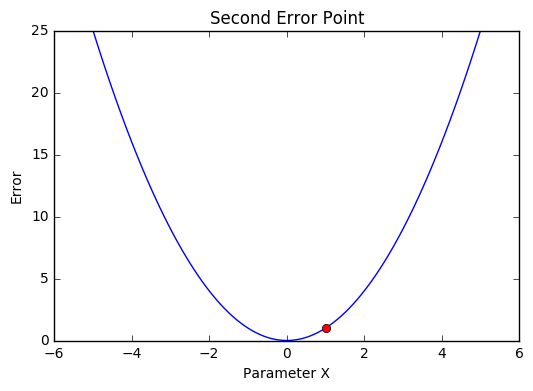

In [2]:
plt.plot(ins,err)
plt.plot(1,1,'ro')
plt.xlabel('Parameter X')
plt.ylabel('Error')
plt.title('Second Error Point')
plt.show()

By looking at the parameter update equation, you can see that if the slope swings positive, the adjustment will now bring us backwards towards the minimum. We can continue this method, approaching the minimum closer and closer until we actually find a derivative of zero, get under some desired threshold of error, or reach some maximum number of iterations.

Now that we have this visualized example, we can dig into the details. To define the above idea in a mathematical way, the goal of steepest descent is to keep updating a function such that

\begin{equation}
    f(x_{k+1}) < f(x_{k}).
\end{equation}

We know we have reached a minimum (or other extremum) when

\begin{equation}
    f(x_{k+1}) = f(x_{k}),
\end{equation}

since the derivative of a function at a minimum or maximum is zero and our above-defined function-updating equation doesn't change if the slope is zero.

Overall, steepest descent is a simple idea which yields good results. Almost all of the complexity of this method lies simply in selecting the right value of $\mu$ for our steps. In our original example, with an $x^2$ shape, if we would have selected a step value of 0.5, we would have oscillated back and forth and never converged to the minimum. Values larger than 0.5 would even cause us to diverge away from the minimum. Thus we need to be wise in our selection of $\mu$ to ensure convergence to a minimum solution. There are some derived requirements for $\mu$ in example 14.5 of [1]. Beginning with an example function defined as

\begin{equation}
    f(x) = x^TRx-2b^Tx,
\end{equation}

where x $\in R^n$ and $R$ is positive semi-definite. For this example the resultant step requirement was

\begin{equation}
    0 < \mu < \frac{2}{\lambda_{max}},
\end{equation}

where $\lambda_{max}$ is the largest eigenvalue of R. Similar rules can be found mathematically for equations where practical, or with a trial-and-error approach for more complex solutions.

## Simple Numerical Examples

We will work through a Least-Mean Squares adaptive filter as an example to emphasize the concepts presented above. The discrete filter can be defined as 

\begin{equation}
    \mathbf{y}[t]=\mathbf{f}[t]^T\mathbf{h},
\end{equation}

where $\mathbf{f}$ is the input and $\mathbf{h}$ is the filter impulse response, and our cost function $J$ which we will seek to minimize is defined as 

\begin{equation}
    J(\mathbf{h})=E\{(\mathbf{d}[t]-\mathbf{y}[t])^2\}.
\end{equation}

Following the derivation in [1], equation 14.13 gives us an update rule (based on the derivative) which is 

\begin{equation}
    \mathbf{h}[t+1]=\mathbf{h}[t]+\mu(E\{\mathbf{f}[t]\mathbf{d}[t]\}-E\{\mathbf{f}[t]\mathbf{f}[t]^T\}\mathbf{h}[t]).
\end{equation}

Say our true system results in a portion of a cubic function, and we start with our adaptive filter impulse response as $h=\mathbf{0}$. From there, follow the plots and code as we progressively update $h$, and observe the inputs passed through the our system which is adapting its impulse response so that the outputs more closely match the desired response. We'll let the input be time. Feel free to adjust $\mu$ and observe how it affects the fit. (Note: in these plots, the green line is our adaptive filter output, and the blue line is our desired filter output)

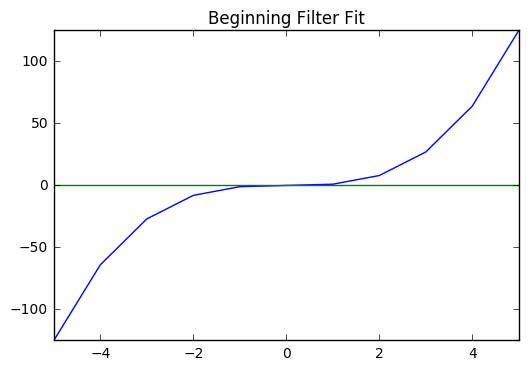

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mu=.05
t=np.arange(-5.0,6.0,1)
desired=[(x**3) for x in t]
h=[0] * t.size;
y=np.multiply(t,h)

plt.plot(t,desired)
plt.plot(t,y)
plt.title('Beginning Filter Fit')
plt.xlim(-5,5)
plt.ylim(-125,125)
plt.show()

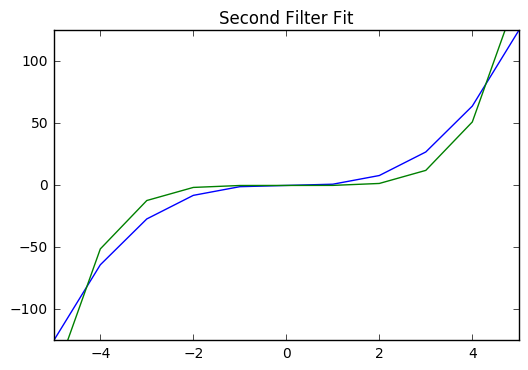

In [4]:
prevh=h
R=[x**2 for x in t]
Rh=np.multiply(R,prevh)
p=np.multiply(t,desired)

newh=prevh+mu*(p-Rh)
y=np.multiply(t,newh)

plt.plot(t,desired)
plt.plot(t,y)
plt.title('Second Filter Fit')
plt.xlim(-5,5)
plt.ylim(-125,125)
plt.show()

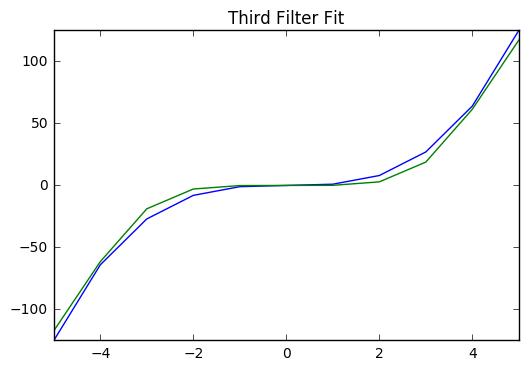

In [5]:
prevh=newh
R=[x**2 for x in t]
Rh=np.multiply(R,prevh)
p=np.multiply(t,desired)

newh=prevh+mu*(p-Rh)
y=np.multiply(t,newh)

plt.plot(t,desired)
plt.plot(t,y)
plt.title('Third Filter Fit')
plt.xlim(-5,5)
plt.ylim(-125,125)
plt.show()

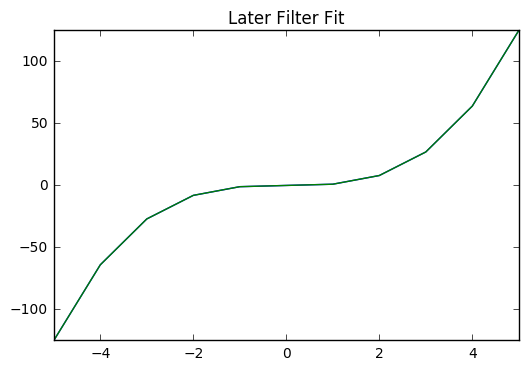

In [6]:
for count in range(100):
    prevh=newh
    R=[x**2 for x in t]
    Rh=np.multiply(R,prevh)
    p=np.multiply(t,desired)

    newh=prevh+mu*(p-Rh)
    
y=np.multiply(t,newh)

plt.plot(t,desired)
plt.plot(t,y)
plt.title('Later Filter Fit')
plt.xlim(-5,5)
plt.ylim(-125,125)
plt.show()

## An Engineering Application

Scatterometry is a field where microwave radar scattering off of the earth's surface is used to improve natural hazard and weather prediction, and study global climate patterns. Many, if not all of the relationships between physical phenomena and radar return echo are too complex, however, to be derived from known equations, especially in the presence of noise. This means methods like gradient descent can be very useful in deriving heuristic models based on real data. For example, the Advanced Scatterometer (ASCAT) was designed to measure ocean winds. It observes radar backscatter ($\sigma$) as seen from 3 different azimuth look angles. Current models, known as Geophysical Model Functions (GMF), are used to retrieve wind speed and direction from these backscatter values. GMFs, however, have inherent ambiguity in their solutions. Thus there is room to improve our models to better discriminate between similar solutions. Here we will explore the idea of creating a model using gradient descent to minimize our error and improve our transfer function. Although this won't be a great model, it will illustrate the idea.

To make things a simple, we'll create our model in this format:

\begin{equation}
    WSPD_{mod}=a\sigma_{av}+b\sigma_{av}^2+c\sigma_{av}^3,
\end{equation}

where $\sigma_{av}$ is the average of the backscatter from the 3 azimuth look angles (fore, mid, and aft)

\begin{equation}
    \sigma_{av} = (\sigma_{f} + \sigma_{m} + \sigma_{a})/3.
\end{equation}

If we define the error as

\begin{equation}
    err=(WSPD-WSPD_{mod})^2,
\end{equation}

then taking the derivative of the error with regards to each of the three adjustable parameters ($a$, $b$, $c$) leads to our update steps, which can be seen in the code below.

The data is actual data from a region near Hawaii. All speeds are reported in meters/second, and all backscatter measurements are in decibels.


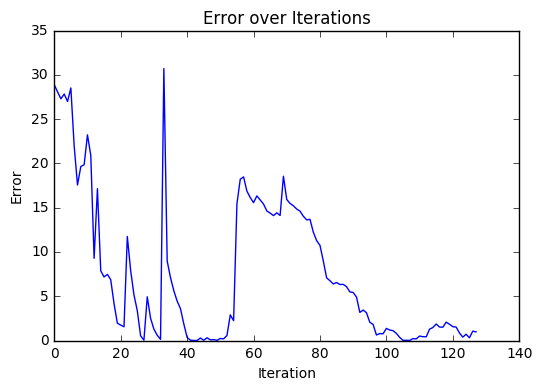

a= -2.98797571844e-06  b= 4.47621004762e-05  c= -0.000622532752604


In [7]:
import numpy as np
import matplotlib.pyplot as plt

sigf=np.array([-19.276, -19.242, -19.207, -19.976, -19.976, -19.976, -20.781, -20.781, -21.059, -21.072, -20.781, -20.801, -20.801, 
-20.801, -20.817, -20.817, -20.817, -20.817, -20.817, -23.026, -23.027, -23.029, -25.722, -25.875, -25.882, -25.89, -25.722,
-25.722, -30.275, -30.275, -30.275, -30.275, -30.275, -37.014, -38.603, -38.603, -38.603, -38.603, -38.603, -33.786, -33.786, 
-34.167, -34.167, -34.167, -32.796, -32.796, -29.174, -29.174, -27.895, -27.801, -26.307, -26.307, -26.307, -25.755, -25.153, 
-18.995, -19.255, -19.298, -19.441, -19.489, -19.536, -19.339, -19.336, -19.374, -19.262, -19.228, -19.297, 
-19.282, -19.421, -19.438, -19.459, -19.59, -19.625, -19.66, -19.596, -19.609, -19.6, -19.501, -19.615, -19.995, -20.023, 
-20.214, -20.264, -20.315, -20.345, -20.388, -20.43, -20.659, -20.772, -20.893, -20.84, -21.197, -21.219, -21.241, -21.157, 
-21.157, -21.155, -21.187, -21.183, -21.243, -21.245, -21.252, -21.166, -21.125, -21.14, -21.302, -21.328, -21.224, -21.223, 
-21.219, -21.21, -21.198, -21.183, -21.946, -22.136, -22.57, -22.636, -22.697, -22.948, -23.004, -23.054, -23.095, -23.125, 
-23.001, -23.025, -22.75, -23.167, -23.181])
sigm=np.array([-10.618, -10.618, -10.618, -11.815, -11.815, -11.815, -11.98, -11.98, -11.98, -11.753, -11.169, -11.169, 
-12.99, -12.99, -15.498, -15.498, -15.498, -15.498, -15.498, -15.245, -15.245, -15.245, -18.749, -18.749, -18.749, -18.749, 
-17.967, -17.967, -20.155, -20.155, -20.155, -20.155, -19.783, -29.264, -29.264, -29.264, -29.264, -29.264, -29.147, -28.837, 
-28.837, -26.396, -26.396, -26.396, -25.281, -25.281, -28.021, -28.021, -28.021, -28.186, -28.707, -28.259, -26.801, -25.714, 
-25.714, -10.414, -10.618, -10.618, -10.618, -10.618, -10.618, -10.618, -10.618, -10.618, -10.953, -10.993, 
-11.031, -11.069, -11.104, -11.139, -11.815, -11.815, -11.802, -11.801, -11.775, -11.775, -11.775, -11.775, -11.98, -11.503, 
-11.51, -11.518, -11.98, -11.98, -11.98, -11.758, -11.73, -11.701, -11.674, -11.647, -11.623, -11.599, -11.815, -11.765, 
-11.831, -11.895, -11.955, -12.99, -12.752, -12.718, -12.116, -12.116, -12.116, -12.116, -15.498, -14.749, -14.764, -14.78, 
-15.498, -15.498, -15.83, -15.885, -15.94, -15.993, -16.043, -16.091, -16.021, -16.026, -16.345, -16.28, -16.218, -16.158, 
-15.151, -15.135, -15.118, -14.865, -14.865, -14.865])
siga=np.array([-16.956, -16.956, -16.956, -16.384, -16.348, -15.636, -17.724, -18.699, -18.138, -18.138, -18.138, -18.73, 
-19.624, -19.624, -19.972, -19.935, -19.286, -19.286, -21.211, -20.556, -20.556, -20.556, -27.459, -27.459, -27.459, -27.459, 
-25.903, -24.06, -26.567, -26.567, -26.567, -26.516, -26.516, -35.173, -37.602, -37.602, -37.602, -37.602, -38.075, -38.075, 
-38.075, -35.793, -37.318, -37.318, -34.893, -32.971, -27.403, -27.403, -27.403, -27.403, -25.669, -25.669, -25.669, -23.397, 
-23.397, -17.617, -17.688, -17.453, -17.892, -18.017, -18.017, -17.623, -17.597, -17.57, -17.332, -17.288, 
-17.246, -17.138, -17.103, -16.587, -16.484, -16.406, -16.373, -16.341, -16.793, -16.829, -16.883, -16.918, -16.951, -17.13, 
-17.16, -17.456, -17.657, -17.638, -17.682, -17.727, -17.772, -17.715, -17.736, -17.859, -17.888, -17.914, -18.483, -18.453, 
-18.472, -19.03, -19.033, -18.771, -18.809, -18.846, -19.395, -19.486, -19.579, -19.95, -20.056, -20.178, -20.187, -20.291, 
-19.852, -19.843, -20.011, -19.845, -19.817, -20.23, -20.245, -20.266, -20.289, -20.318, -20.349, -20.405, -20.447, -20.75, 
-20.722, -20.552, -20.858, -20.948, -21.862, -21.93])
desired=np.array([5.3735, 5.3758, 5.3789, 5.5261, 5.5361, 5.7512, 5.2828, 4.9356, 5.2705, 5.3911, 5.8092, 
5.7077, 4.4992, 5.6902, 4.7739, 4.7662, 4.8616, 4.8616, 4.6411, 4.2863, 4.2871, 4.2871, 2.2614, 2.2568, 2.2568, 
2.2561, 2.6376, 2.7985, 2.1378, 2.1378, 2.1378, 2.1622, 2.3179, 0.45091, 0.40819, 0.40819, 0.40819, 0.40819, 0.41429, 
0.50279, 0.50279, 0.84231, 0.83087, 0.83087, 1.2421, 1.2749, 1.5473, 1.5473, 1.6579, 1.6327, 1.8876, 1.9997, 2.3812, 
3.3135, 3.4722, 4.5183, 4.9387, 5.0279, 4.9341, 4.9234, 4.9226, 5.0478, 5.0539, 5.06, 5.0195, 5.0462, 
5.0737, 5.1683, 5.2011, 5.7672, 5.5742, 5.5887, 5.6185, 5.6352, 5.7093, 5.7054, 5.7207, 5.7848, 5.6948, 5.6291, 
5.6207, 5.4758, 5.3056, 5.3072, 5.3026, 5.3667, 5.3865, 5.4682, 5.491, 5.4628, 5.4903, 5.5002, 5.2789, 5.3858, 
5.3514, 5.1943, 5.1576, 4.8158, 4.8906, 4.9173, 5.2293, 5.2057, 5.2057, 5.1599, 4.5991, 4.9165, 4.9081, 4.96, 
4.6602, 4.6648, 4.4984, 4.4855, 4.4687, 4.2848, 4.2199, 4.1368, 4.1963, 4.1589, 4.0376, 4.0452, 4.075, 4.0887, 
4.0628, 4.2344, 4.0544, 4.1879, 4.0101, 4.0056])

t=np.arange(0,sigf.size,1)

ins=[]
for i in range(sigf.size):
    ins.append((sigf[i]+sigm[i]+siga[i])/3)
    
mu=5*10**(-10)
newa=0
newb=0
newc=0
err=[]
model=[]

for k in range(sigf.size):
    a=newa
    b=newb
    c=newc
    model.append(a*ins[k]+b*ins[k]**2+c*ins[k]**3)
    err.append((desired[k]-model[k])**2)
    newa = a - mu*(-2*desired[k]*ins[k] + 2*a*(ins[k])**2 + 2*b*ins[k]**3 + 2*c*ins[k]**4)
    newb = b - mu*(-2*desired[k]*ins[k]**2 + 2*b*(ins[k])**4 + 2*a*ins[k]**3 + 2*c*ins[k]**5)
    newc = c - mu*(-2*desired[k]*ins[k]**3 + 2*c*(ins[k])**6 + 2*a*ins[k]**4 + 2*b*ins[k]**5)  

plt.plot(t,err)
plt.title('Error over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

print('a=',a,' b=',b,' c=',c)

## References

[1] Moon, Todd K., and Wynn C. Stirling. Mathematical Methods and Algorithms for Signal Processing. Prentice Hall, 2000.
